### Calibration testing

In [14]:
from model_complex.compartmental_models import Calibration, EpidData, FactoryModel
import matplotlib.pyplot as plt

epid_data = EpidData(city='samara', path='./', 
                start_time='01-07-2016', end_time='20-06-2017', 
                regime='total')
data_df = epid_data.get_wave_data()
data_df.head()

,datetime,total_cases,total_population
339,2016-07-04,0.0,1182379
340,2016-07-11,0.0,1182379
341,2016-07-18,0.0,1182379
342,2016-07-25,0.0,1182379
343,2016-08-01,0.0,1182379


In [10]:
prepared_data = epid_data.prepare_for_calibration()

In [11]:
init_infected = [100]
model =  FactoryModel.get_model('BR-total')

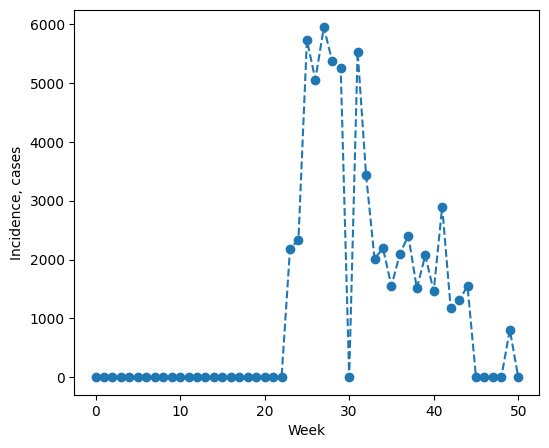

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.set_xlabel('Week')
ax.set_ylabel('Incidence, cases')
ax.plot(prepared_data, "--o")

In [13]:
rho = int(data_df['total_population'].iloc[0])
d = Calibration(init_infected, model, prepared_data, rho)
idata, data, simulation_func = d.abc_calibration()

Initializing SMC sampler...
Sampling 4 chains in 4 jobs
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


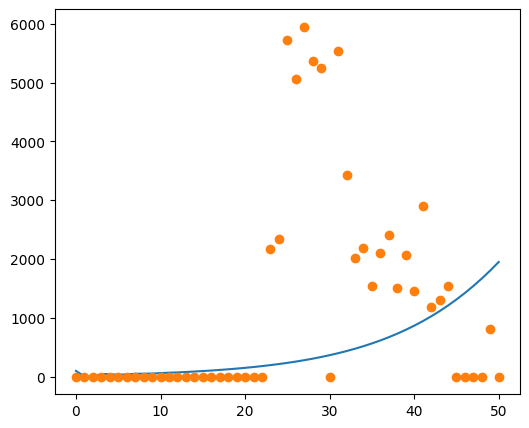

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
start_day = 15    
posterior = idata.posterior.stack(samples=("draw", "chain"))
alpha = [posterior["a"].mean()]
beta = [posterior["b"].mean()] 

ax.plot(simulation_func(None, alpha, beta))
ax.plot(list(data), "o")

In [16]:
from sklearn.metrics import r2_score
r2_score(list(data)[int(len(data)/2):], simulation_func(None, alpha, beta)[int(len(data)/2):])

-0.9870834216046895